In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy as sql
import datetime as dt

In [2]:
engine = sql.create_engine('sqlite:///EDA_project.db')
all_tables = engine.table_names()
all_tables

<ipython-input-2-b6e45de731ce>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['MTA']

In [3]:
MTA_data = pd.read_sql('SELECT * FROM MTA;', engine)
MTA_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802
...,...,...,...,...,...,...,...,...,...,...,...
2932340,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638
2932341,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638
2932342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638
2932343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638


In [4]:
metadata = sql.MetaData()
connection = engine.connect()
MTA = sql.Table('MTA', metadata, autoload=True, autoload_with=engine)

In [5]:
results = connection.execute(sql.select([MTA])).fetchall()
df = pd.DataFrame(results)
df.columns = results[0].keys()
df.describe()

,ENTRIES,EXITS
count,2.932345e+06,2.932345e+06
mean,4.163677e+07,3.327455e+07
std,2.183826e+08,1.918740e+08
min,0.000000e+00,0.000000e+00
25%,2.182180e+05,9.998500e+04
50%,1.404623e+06,8.551120e+05
75%,6.020096e+06,3.970328e+06
max,2.147417e+09,2.133797e+09


In [6]:
df.shape

(2932345, 11)

In [7]:
## check if there is any null values
df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [8]:
## Preparing the data
turnstiles_df=df[df['DESC'] == 'REGULAR']

In [9]:
turnstiles_df.columns = [x.strip()  for x in turnstiles_df.columns]

In [10]:
# creating a timestamp column with datetime object to preform easy calculations
turnstiles_df['DateTime'] = pd.to_datetime(turnstiles_df['DATE'] + ' ' + turnstiles_df['TIME'])
turnstiles_df

<ipython-input-10-a3602f9aba73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_df['DateTime'] = pd.to_datetime(turnstiles_df['DATE'] + ' ' + turnstiles_df['TIME'])


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2932340,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638,2021-09-03 05:00:00
2932341,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638,2021-09-03 09:00:00
2932342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638,2021-09-03 13:00:00
2932343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638,2021-09-03 17:00:00


In [11]:
## gets the number of entries and exits
mta = turnstiles_df.groupby(['STATION'])

In [237]:
mta_entries = turnstiles_df.groupby(['STATION'])[['ENTRIES']].max() - turnstiles_df.groupby(['STATION'])[['ENTRIES']].min()
mta_exits = turnstiles_df.groupby(['STATION'])[['EXITS']].max() - turnstiles_df.groupby(['STATION'])[['EXITS']].min()

In [238]:
mta_entries

,ENTRIES
STATION,
1 AV,370897978
103 ST,26110480
103 ST-CORONA,16274591
104 ST,1681052420
110 ST,10261086
...,...
WOODLAWN,8474504
WORLD TRADE CTR,1580169407
WTC-CORTLANDT,730981739


In [255]:
mta_exits = mta_exits.sort_values(by= "EXITS", ascending =False)
mta_entries = mta_entries.sort_values(by= "ENTRIES", ascending = False)

In [240]:
mta_exits=mta_exits.reset_index()
mta_entries=mta_entries.reset_index()

In [259]:
diff=mta_exits[:10]mta_exits_low[:10]

In [260]:
diff

,STATION,EXITS
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


(array([0.00e+00, 2.50e+08, 5.00e+08, 7.50e+08, 1.00e+09, 1.25e+09,
        1.50e+09, 1.75e+09, 2.00e+09, 2.25e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

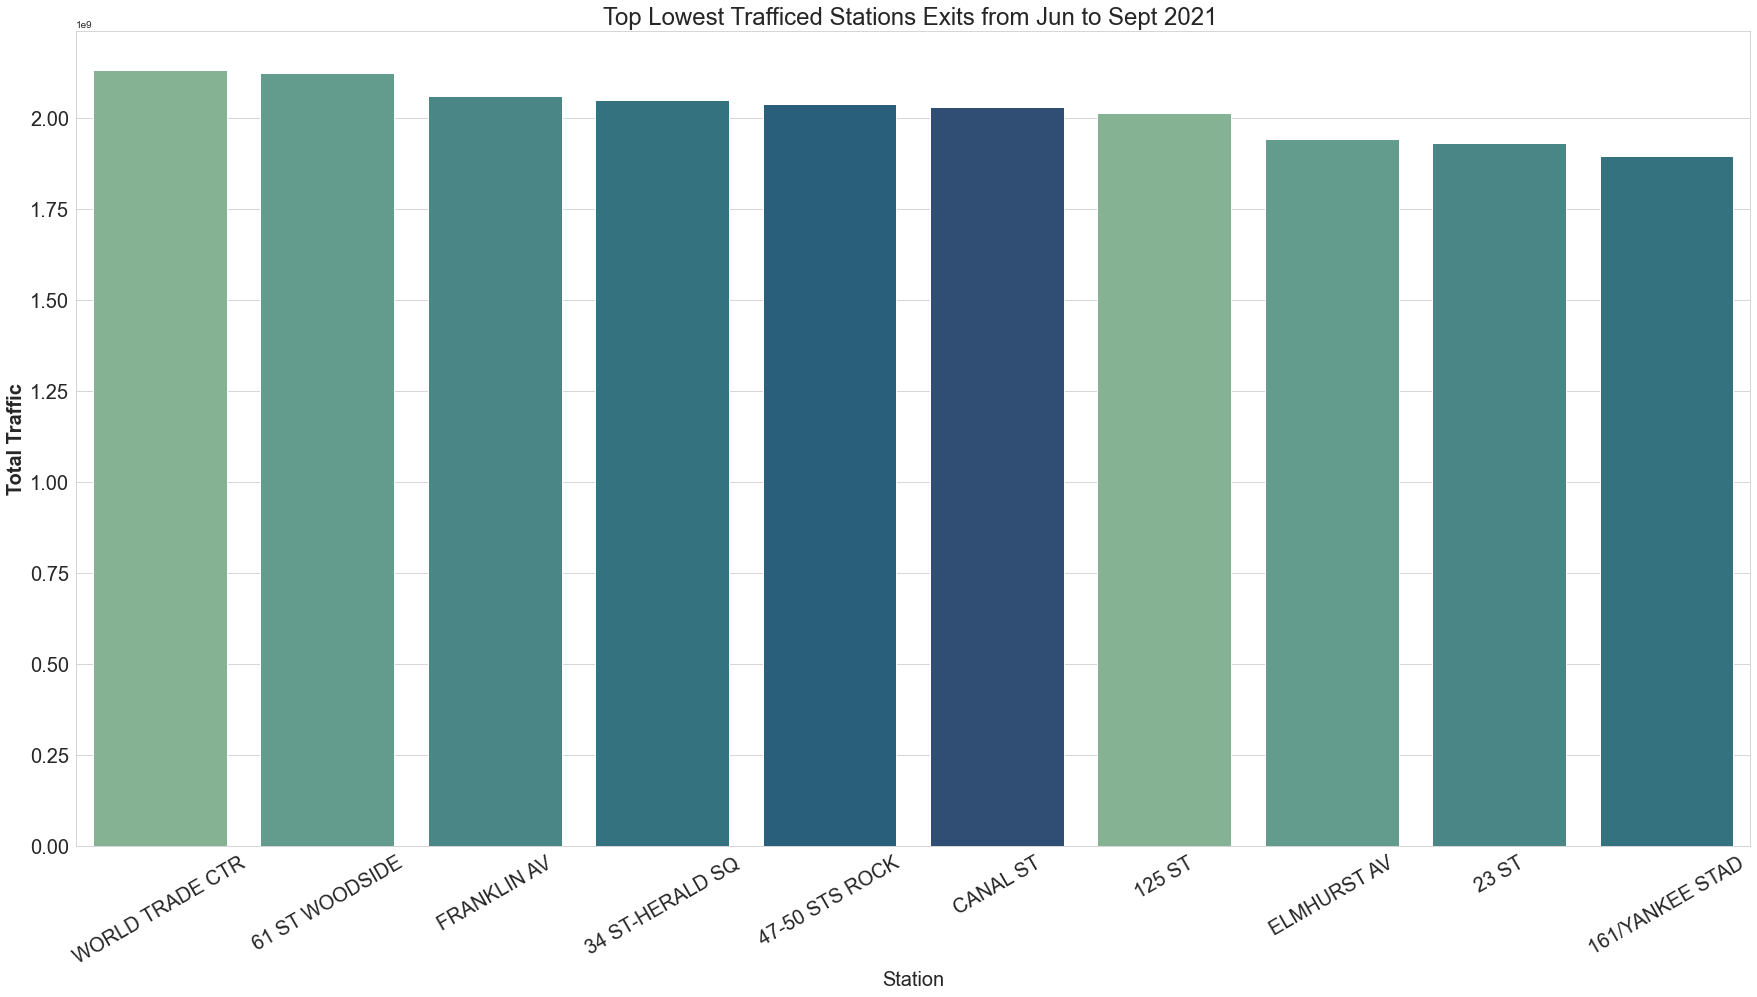

In [270]:
plt.figure(figsize=[30,15])

sns.barplot( x='STATION',y="EXITS",data=mta_exits[:10] , palette= sns.color_palette("crest"))
plt.title('Top Lowest Trafficed Stations Exits from Jun to Sept 2021 ', fontsize=24)
plt.xlabel('Station', fontsize=20);
plt.ylabel('Total Traffic',weight="bold", fontsize=20)
plt.xticks(fontsize=20, rotation=30)
plt.yticks(fontsize=20)
#plt.savefig('Top Lowest Trafficed Stations Exits from Jun to Sept 20212.png')

In [18]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2932340,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638,2021-09-03 05:00:00
2932341,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638,2021-09-03 09:00:00
2932342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638,2021-09-03 13:00:00
2932343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638,2021-09-03 17:00:00


In [19]:

# def TimePeriod(time):
#     if pd.to_datetime(time) >= pd.to_datetime("00:00:00") and pd.to_datetime(time) < pd.to_datetime("12:00:00"):
#         return "morning"
#     else :
#         return "evening"

def TimePeriod(time):
    time = dt.datetime.strptime(time,'%H:%M:%S').time()
    if time >= dt.time(0,0,0) and time < dt.time(12,0,0):
        return "morning"
    else:
        return "evening"
        


In [20]:
turnstiles_df['TIME_PERIOD'] = turnstiles_df['TIME'].apply(TimePeriod)   

<ipython-input-20-47dd6ed660c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_df['TIME_PERIOD'] = turnstiles_df['TIME'].apply(TimePeriod)


In [21]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime,TIME_PERIOD
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00,morning
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00,morning
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00,morning
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00,evening
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932340,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638,2021-09-03 05:00:00,morning
2932341,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638,2021-09-03 09:00:00,morning
2932342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638,2021-09-03 13:00:00,evening
2932343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638,2021-09-03 17:00:00,evening


In [22]:
# turnstiles_df[turnstiles_df['TIME_PERIOD'] == 'evening']
# turnstiles_df

In [131]:
mta_entries_TP = (turnstiles_df.groupby(['STATION','TIME_PERIOD'])[['ENTRIES']].max() - turnstiles_df.groupby(['STATION','TIME_PERIOD'])[['ENTRIES']].min()).reset_index()
mta_exits_TP = turnstiles_df.groupby(['STATION','TIME_PERIOD'])[['EXITS']].max() - turnstiles_df.groupby(['STATION','TIME_PERIOD'])[['EXITS']].min()


In [132]:
mta_entries_TP


,STATION,TIME_PERIOD,ENTRIES
0,1 AV,evening,370897978
1,1 AV,morning,370897836
2,103 ST,evening,26110216
3,103 ST,morning,26110053
4,103 ST-CORONA,evening,16274248
...,...,...,...
753,WTC-CORTLANDT,morning,730981569
754,YORK ST,evening,16975314
755,YORK ST,morning,16974363
756,ZEREGA AV,evening,1296757


In [133]:
mta_exits_TP= mta_exits_TP.sort_values(by= ["EXITS",'STATION'], ascending = False)
# mta_entries_TP.sort_values(by= "ENTRIES", ascending = False)
# mta_exits_TP=mta_exits_TP.reset_index()
# mta_entries_TP=mta_exits_TP.reset_index()
mta_exits_TP

EXITS
STATION         TIME_PERIOD            
WORLD TRADE CTR evening      2133796527
61 ST WOODSIDE  morning      2122890258
                evening      2122889991
FRANKLIN AV     morning      2062019338
                evening      2062019209
...                                 ...
NEWARK BM BW    morning           40854
ORCHARD BEACH   evening           24958
                morning           24958
RIT-MANHATTAN   evening           24011
                morning           23993

[758 rows x 1 columns]

In [149]:
mta_exits_TP = mta_exits_TP.reset_index()
mta_exits_TP[mta_exits_TP["STATION"] == "WORLD TRADE CTR"]#.groupby(["STATION","TIME_PERIOD"])

,index,STATION,TIME_PERIOD,EXITS
0,0,WORLD TRADE CTR,evening,2133796527
35,35,WORLD TRADE CTR,morning,1829129865


In [129]:
mta_exits_TP

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 753    False
 754    False
 755    False
 756    False
 757    False
 Name: STATION, Length: 758, dtype: bool]

<AxesSubplot:xlabel='STATION', ylabel='EXITS'>

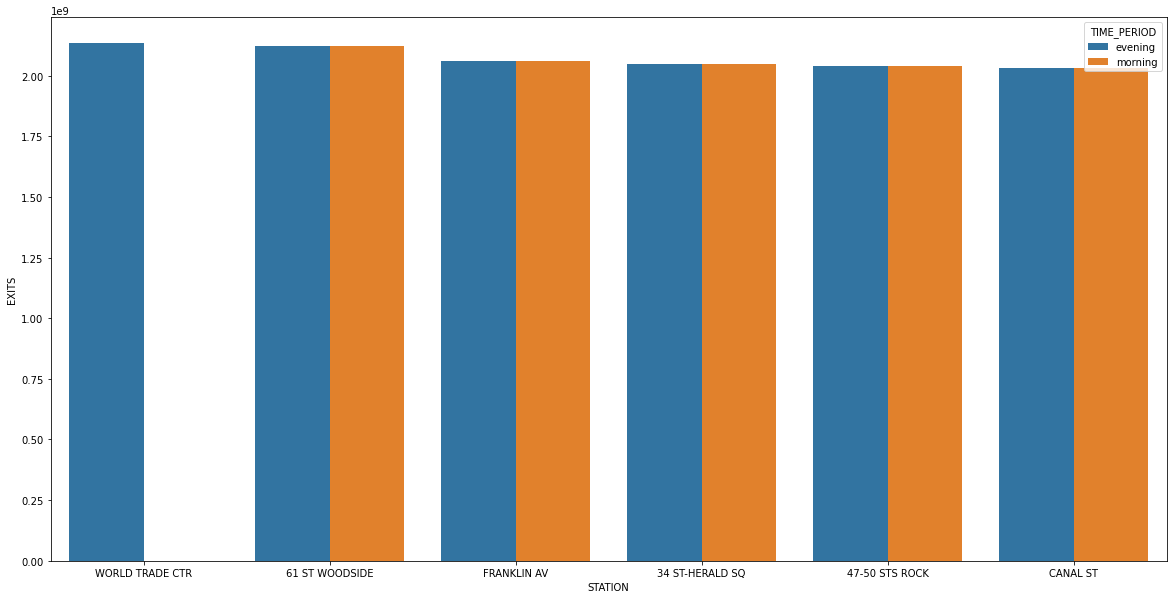

In [114]:
plt.figure(figsize=(20,10))
sns.barplot(x=mta_exits_TP.STATION[:11],y=mta_exits_TP.EXITS[:11], data = mta_exits_TP, hue ="TIME_PERIOD")


In [73]:
mta_exits_TP.head(5)
mta_exits_TP[mta_exits_TP.TIME_PERIOD=='evening']
mta_exits_TP[mta_exits_TP.TIME_PERIOD=='morning']

result = pd.merge(mta_exits_TP[mta_exits_TP.TIME_PERIOD=='evening'], mta_exits_TP[mta_exits_TP.TIME_PERIOD=='morning'], on="STATION")
result.head(5)

,STATION,TIME_PERIOD_x,EXITS_x,TIME_PERIOD_y,EXITS_y
0,WORLD TRADE CTR,evening,2133796527,morning,1829129865
1,61 ST WOODSIDE,evening,2122889991,morning,2122890258
2,FRANKLIN AV,evening,2062019209,morning,2062019338
3,34 ST-HERALD SQ,evening,2049343597,morning,2049342126
4,47-50 STS ROCK,evening,2038954786,morning,2038953629


In [137]:
result.head(5)

,STATION,TIME_PERIOD_x,EXITS_x,TIME_PERIOD_y,EXITS_y
0,WORLD TRADE CTR,evening,2133796527,morning,1829129865
1,61 ST WOODSIDE,evening,2122889991,morning,2122890258
2,FRANKLIN AV,evening,2062019209,morning,2062019338
3,34 ST-HERALD SQ,evening,2049343597,morning,2049342126
4,47-50 STS ROCK,evening,2038954786,morning,2038953629


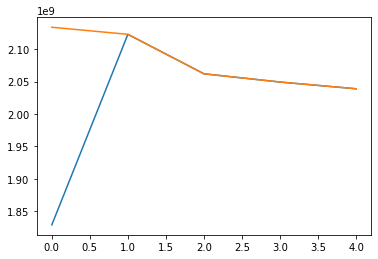

In [138]:
labels = result.STATION[:5]
labels
morning = result.EXITS_y[:5]
evening= result.EXITS_x[:5]
plt.plot(morning)
plt.plot(evening)

In [141]:
mta_exits_TP

,STATION,TIME_PERIOD,EXITS
0,WORLD TRADE CTR,evening,2133796527
1,61 ST WOODSIDE,morning,2122890258
2,61 ST WOODSIDE,evening,2122889991
3,FRANKLIN AV,morning,2062019338
4,FRANKLIN AV,evening,2062019209
...,...,...,...
753,NEWARK BM BW,morning,40854
754,ORCHARD BEACH,evening,24958
755,ORCHARD BEACH,morning,24958
756,RIT-MANHATTAN,evening,24011


In [151]:
mm = mta_exits_TP[mta_exits_TP["STATION"] == "WORLD TRADE CTR"]

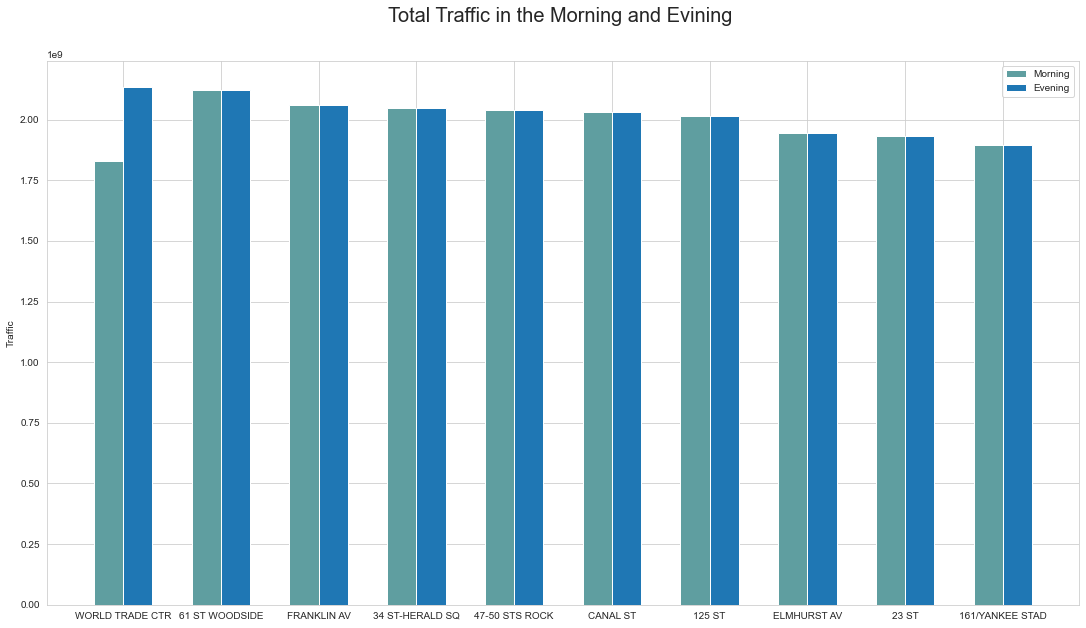

In [236]:
labels = result.STATION[:10]
labels
morning = result.EXITS_y[:10]
evening= result.EXITS_x[:10]

x = np.arange(len(labels))  # the label locations
width = 0.30 # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10)
rects1 = ax.bar(x - width/2, morning, width, label='Morning',color='cadetblue')
rects2 = ax.bar(x + width/2, evening, width, label='Evening')


ax.set_ylabel('Traffic')
ax.set_title('Total Traffic in the Morning and Evining ',size=20 ,pad=39)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('Total Traffic in the Morning and Evining.png')
plt.show()


<AxesSubplot:xlabel='STATION', ylabel='EXITS'>

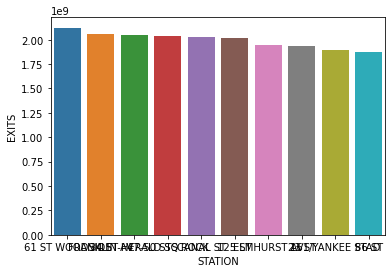

In [147]:
sns.barplot(x="STATION",y="EXITS", data=mta_exits_TP[mta_exits_TP.TIME_PERIOD == "morning"][:10])